# Homework part I

The first problem set contains basic tasks in PyTorch.

__Note:__ Instead of doing this part of homework, you can prove your skills otherwise:
* A commit to PyTorch or PyTorch-based repos will do;
* Fully implemented seminar assignment in tensorflow or theano will do;
* Your own project in PyTorch that is developed to a state in which a normal human can understand and appreciate what it does.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch, torch.nn as nn
import torch.nn.functional as F
print(torch.__version__)

1.12.1+cu113


### Task I - tensormancy

![img](https://media.giphy.com/media/3o751UMCYtSrRAFRFC/giphy.gif)

When dealing with more complex stuff like neural network, it's best if you use tensors the way samurai uses his sword. 


__1.1 The Cannabola__
[(_disclaimer_)](https://gist.githubusercontent.com/justheuristic/e2c1fa28ca02670cabc42cacf3902796/raw/fd3d935cef63a01b85ed2790b5c11c370245cbd7/stddisclaimer.h)

Let's write another function, this time in polar coordinates:
$$\rho(\theta) = (1 + 0.9 \cdot cos (8 \cdot \theta) ) \cdot (1 + 0.1 \cdot cos(24 \cdot \theta)) \cdot (0.9 + 0.05 \cdot cos(200 \cdot \theta)) \cdot (1 + sin(\theta))$$


Then convert it into cartesian coordinates ([howto](http://www.mathsisfun.com/polar-cartesian-coordinates.html)) and plot the results.

Use torch tensors only: no lists, loops, numpy arrays, etc.

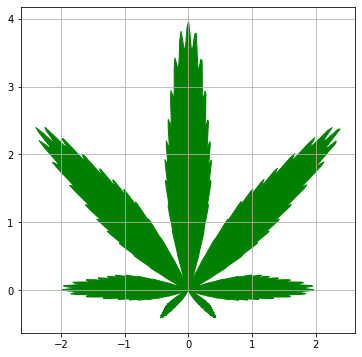

In [ ]:
theta = torch.linspace(-np.pi, np.pi, steps=1000)

# compute rho(theta) as per formula above
rho = (1 + 0.9 * torch.cos(8*theta)) * (1 + 0.1 * torch.cos(24*theta)) * (0.9 + 0.05 * torch.cos(200*theta)) * (1 + torch.sin(theta))

# Now convert polar (rho, theta) pairs into cartesian (x,y) to plot them.
x = rho * torch.cos(theta)
y = rho * torch.sin(theta)


plt.figure(figsize=[6, 6])
plt.fill(x.numpy(), y.numpy(), color='green')
plt.grid()

![snoop](https://i.ytimg.com/vi/gFz4ExfYqyk/hqdefault.jpg)

YEEA THC!

### Task II: The Game of Life

Now it's time for you to make something more challenging. We'll implement Conway's [Game of Life](http://web.stanford.edu/~cdebs/GameOfLife/) in _pure PyTorch_.

While this is still a toy task, implementing game of life this way has one cool benefit: __you'll be able to run it on GPU!__ Indeed, what could be a better use of your GPU than simulating Game of Life on 1M/1M grids?

![img](https://cdn.tutsplus.com/gamedev/authors/legacy/Stephane%20Beniak/2012/09/11/Preview_Image.png)
If you've skipped the URL above out of sloth, here's the Game of Life:
* You have a 2D grid of cells, where each cell is "alive"(1) or "dead"(0)
* Any living cell that has 2 or 3 neighbors survives, else it dies [0,1 or 4+ neighbors]
* Any cell with exactly 3 neighbors becomes alive (if it was dead)

For this task, you are given a reference NumPy implementation that you must convert to PyTorch.
_[NumPy code inspired by: https://github.com/rougier/numpy-100]_


__Note:__ You can find convolution in `torch.nn.functional.conv2d(Z,filters)`. Note that it has a different input format.

__Note 2:__ From the mathematical standpoint, PyTorch convolution is actually cross-correlation. Those two are very similar operations. More info: [video tutorial](https://www.youtube.com/watch?v=C3EEy8adxvc), [scipy functions review](http://programmerz.ru/questions/26903/2d-convolution-in-python-similar-to-matlabs-conv2-question), [stack overflow source](https://stackoverflow.com/questions/31139977/comparing-matlabs-conv2-with-scipys-convolve2d).

In [ ]:
from scipy.signal import correlate2d

def np_update(Z):
    # Count neighbours with convolution
    filters = np.array([[1, 1, 1],
                        [1, 0, 1],
                        [1, 1, 1]])

    N = correlate2d(Z, filters, mode='same')

    # Apply rules
    birth = (N == 3) & (Z == 0)
    survive = ((N == 2) | (N == 3)) & (Z == 1)

    Z[:] = birth | survive
    return Z

In [ ]:
def torch_update(Z):
    """
    Implement an update function that does to Z exactly the same as np_update.
    :param Z: torch.FloatTensor of shape [height,width] containing 0s(dead) an 1s(alive)
    :returns: torch.FloatTensor Z after updates.
    
    You can opt to create new tensor or change Z inplace.
    """
    filters = torch.Tensor([[[[1, 1, 1],
                             [1, 0, 1],
                             [1, 1, 1]]]])
    N = torch.nn.functional.conv2d(Z.unsqueeze(0).unsqueeze(0), filters, stride=(1, 1), padding=(1, 1)).squeeze()

    # Apply rules
    birth = torch.logical_and(N == 3, Z == 0)
    survive = torch.logical_and(torch.logical_or(N == 2, N == 3), Z == 1)

    Z[:] = torch.logical_or(birth, survive)
    return Z


In [ ]:
# initial frame
Z_numpy = np.random.choice([0, 1], p=(0.5, 0.5), size=(100, 100))
Z = torch.from_numpy(Z_numpy).type(torch.FloatTensor)

# your debug polygon :)
Z_new = torch_update(Z.clone())

# tests
Z_reference = np_update(Z_numpy.copy())
assert np.all(Z_new.numpy() == Z_reference), \
    "your PyTorch implementation doesn't match np_update. Look into Z and np_update(ZZ) to investigate."
print("Well done!")

Well done!


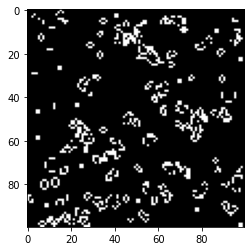

In [ ]:
%matplotlib inline
plt.ion()

# initialize game field
Z = np.random.choice([0, 1], size=(100, 100))
Z = torch.from_numpy(Z).type(torch.FloatTensor)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):
    # update
    Z = torch_update(Z)

    # re-draw image
    ax.clear()
    ax.imshow(Z.numpy(), cmap='gray')
    fig.canvas.draw()

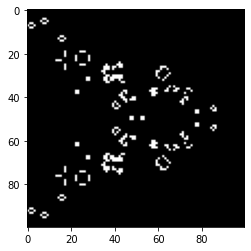

In [ ]:
# Some fun setups for your amusement

# parallel stripes
Z = np.arange(100) % 2 + np.zeros([100, 100])
# with a small imperfection
Z[48:52, 50] = 1

Z = torch.from_numpy(Z).type(torch.FloatTensor)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):
    Z = torch_update(Z)
    ax.clear()
    ax.imshow(Z.numpy(), cmap='gray')
    fig.canvas.draw()

More fun with Game of Life: [video](https://www.youtube.com/watch?v=C2vgICfQawE) and/or [Jupyter Notebook](https://nbviewer.jupyter.org/url/norvig.com/ipython/Life.ipynb)

### Task III: Going deeper
<img src="http://download.gamezone.com/uploads/image/data/1190338/article_post_width_a88.jpg" width=360>

Your third trial is to build your first neural network [almost] from scratch and pure PyTorch.

This time you will solve yet another digit recognition problem, but at a greater scale

* 10 different letters
* 20k samples

We want you to build a network that reaches at least 80% accuracy and has at least 2 linear layers in it. Naturally, it should be nonlinear to beat logistic regression.


With 10 classes you will need to use __Softmax__ at the top instead of sigmoid and train using __categorical crossentropy__  (see [here](http://wiki.fast.ai/index.php/Log_Loss)).  Write your own loss or use `torch.nn.functional.nll_loss`. Just make sure you understand what it accepts as input.

Note that you are not required to build 152-layer monsters here. A 2-layer (one hidden, one output) neural network should already give you an edge over logistic regression.


__[bonus kudos]__
If you've already beaten logistic regression with a two-layer net, but enthusiasm still ain't gone, you can try improving the test accuracy even further! It should be possible to reach 90% without convnets.

__SPOILERS!__
At the end of the notebook you will find a few tips and frequent errors.
If you feel confident enough, just start coding right away and get there ~~if~~ once you need to untangle yourself.

In [ ]:
!wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_DL/fall21/week02_autodiff/notmnist.py

In [ ]:
from notmnist import load_notmnist
X_train, y_train, X_test, y_test = load_notmnist(letters='ABCDEFGHIJ')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done


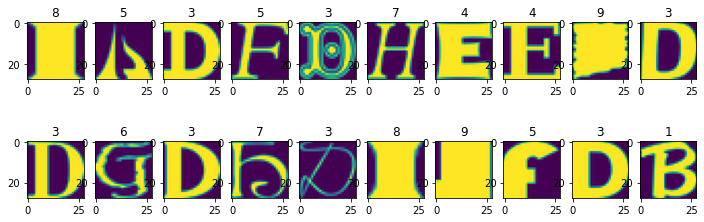

In [ ]:
%matplotlib inline
plt.figure(figsize=[12, 4])
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_train[i].reshape([28, 28]))
    plt.title(str(y_train[i]))

In [ ]:
def ce_loss(input: torch.Tensor, labels: torch.Tensor):
    """
    :param input: prediction (raw logits) [B, C]
    :param labels: one-hoted labels [B, C]
    """
    input = F.softmax(input, -1)
    return -(torch.sum(torch.log(input[labels == 1]))) / input.shape[0]

In [ ]:
# test nll loss
torch_loss = nn.CrossEntropyLoss()
test_input = torch.randn(5, 10, dtype=torch.float)
test_label = torch.randint(low=0, high=2, size=(5, 10),  dtype=torch.float)
torch.isclose(torch_loss(test_input, test_label), ce_loss(test_input, test_label))


tensor(True)

In [ ]:
class Block(nn.Module):
    def __init__(self, in_features, out_features, activation):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        self.act = nn.ReLU() if activation else nn.Identity()

    def forward(self, x):
        return self.act(self.linear(x))


class Net(nn.Module):
    def __init__(self, features):
        assert len(features) > 0
        super().__init__()
        self.first = nn.Linear(784, features[0])

        if len(features) > 1:

            layers = [
                Block(features[i], features[i + 1], 
                      activation=(i + 1) != (len(features) - 1)) for i in range(len(features) - 1)
                ]
            layers.insert(0, nn.ReLU())
            self.layers = nn.Sequential(*layers)
        else: 
            self.layers = nn.Identity()


    def forward(self, x):
        x = self.first(x)
        x = self.layers(x)
        return x


In [ ]:
# logistic regression

batch_size = 256
n_iters = 200
lr = 3e-4

logreg = Net([10])
optimizer = torch.optim.Adam(logreg.parameters(), lr=lr)

for it in range(n_iters):
    optimizer.zero_grad()
    ix = np.random.randint(0, len(X_train), batch_size)
    x_batch = torch.tensor(X_train[ix], dtype=torch.float32)
    y_batch = torch.tensor(y_train[ix])

    y_batch_ohe = F.one_hot(y_batch).to(torch.float32)

    output = logreg(x_batch)
    loss_value = ce_loss(output, y_batch_ohe)
    loss_value.backward()
    optimizer.step()
    print(f'it = {it}, loss = {loss_value}')

    if (it + 1) % 10 == 0:
        with torch.inference_mode():
            x_test_tensor = torch.tensor(X_test, dtype=torch.float32)
            y_test_tensor = torch.tensor(y_test)
            output = logreg(x_test_tensor)
            output = torch.argmax(output, dim=-1)
            val_score = (output == y_test_tensor).sum() / y_test_tensor.shape[0]
            print(f'val accuracy - {val_score}')




it = 0, loss = 2.5240094661712646
it = 1, loss = 2.3799102306365967
it = 2, loss = 2.265092611312866
it = 3, loss = 2.247236728668213
it = 4, loss = 2.1489923000335693
it = 5, loss = 2.140119791030884
it = 6, loss = 1.9807207584381104
it = 7, loss = 1.9590802192687988
it = 8, loss = 1.9248268604278564
it = 9, loss = 1.7914024591445923
val accuracy - 0.4383678734302521
it = 10, loss = 1.8428099155426025
it = 11, loss = 1.7692463397979736
it = 12, loss = 1.696760892868042
it = 13, loss = 1.6782864332199097
it = 14, loss = 1.5988357067108154
it = 15, loss = 1.5401525497436523
it = 16, loss = 1.5324287414550781
it = 17, loss = 1.477225661277771
it = 18, loss = 1.4080747365951538
it = 19, loss = 1.4426690340042114
val accuracy - 0.6408886909484863
it = 20, loss = 1.4062366485595703
it = 21, loss = 1.3596441745758057
it = 22, loss = 1.207319974899292
it = 23, loss = 1.4061133861541748
it = 24, loss = 1.29685378074646
it = 25, loss = 1.293755054473877
it = 26, loss = 1.2294747829437256
it = 2

In [ ]:
# LOGISTIC REGRESSION (1 layer) - 87% accuracy *~*

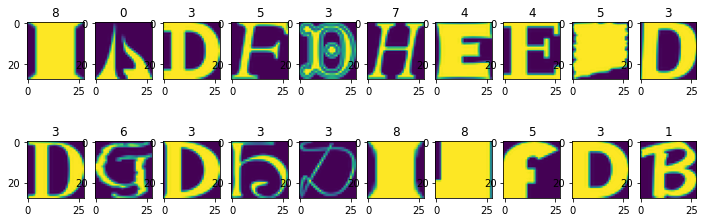

In [ ]:
%matplotlib inline
plt.figure(figsize=[12, 4])
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_train[i].reshape([28, 28]))
    label = logreg(torch.tensor(X_train[i], dtype=torch.float)).argmax().cpu().numpy()
    plt.title(str(label))

In [ ]:
# VERY-DEEP neural network

batch_size = 256
n_iters = 600
lr = 1e-2

model = Net([30, 40, 10])
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

for it in range(n_iters):
    optimizer.zero_grad()
    ix = np.random.randint(0, len(X_train), batch_size)
    x_batch = torch.tensor(X_train[ix], dtype=torch.float32)
    y_batch = torch.tensor(y_train[ix])

    y_batch_ohe = F.one_hot(y_batch).to(torch.float32)

    output = model(x_batch)
    loss_value = ce_loss(output, y_batch_ohe)
    loss_value.backward()
    optimizer.step()
    print(f'it = {it}, loss = {loss_value}')

    if (it + 1) % 10 == 0:
        with torch.inference_mode():
            x_test_tensor = torch.tensor(X_test, dtype=torch.float32)
            y_test_tensor = torch.tensor(y_test)
            output = model(x_test_tensor)
            output = torch.argmax(output, dim=-1)
            val_score = (output == y_test_tensor).sum() / y_test_tensor.shape[0]
            print(f'val accuracy - {val_score}')



it = 0, loss = 2.311821937561035
it = 1, loss = 2.103504180908203
it = 2, loss = 1.7270400524139404
it = 3, loss = 1.438483715057373
it = 4, loss = 0.9931108355522156
it = 5, loss = 0.8222015500068665
it = 6, loss = 0.6996710896492004
it = 7, loss = 0.7339873313903809
it = 8, loss = 0.6702607274055481
it = 9, loss = 0.7117277979850769
val accuracy - 0.8457594513893127
it = 10, loss = 0.69920414686203
it = 11, loss = 0.6641921997070312
it = 12, loss = 0.5635116100311279
it = 13, loss = 0.5998449921607971
it = 14, loss = 0.6428958773612976
it = 15, loss = 0.4073326587677002
it = 16, loss = 0.6062344312667847
it = 17, loss = 0.6367536187171936
it = 18, loss = 0.46885430812835693
it = 19, loss = 0.522348940372467
val accuracy - 0.868190586566925
it = 20, loss = 0.41963616013526917
it = 21, loss = 0.47701340913772583
it = 22, loss = 0.42962098121643066
it = 23, loss = 0.4768570065498352
it = 24, loss = 0.2969512939453125
it = 25, loss = 0.3545907735824585
it = 26, loss = 0.4920494854450226


In [ ]:
# VERY DEEP neural network accuracy (3 layers) = 91%

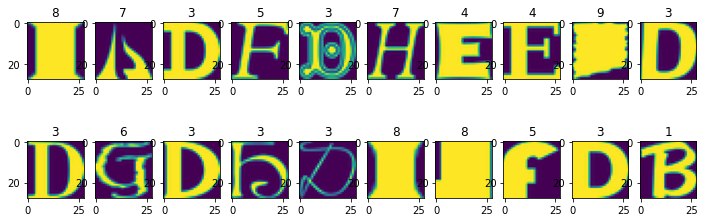

In [ ]:
%matplotlib inline
plt.figure(figsize=[12, 4])
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_train[i].reshape([28, 28]))
    label = model(torch.tensor(X_train[i], dtype=torch.float)).argmax().cpu().numpy()
    plt.title(str(label))

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

# SPOILERS!

Recommended pipeline:

* Adapt logistic regression from seminar assignment to classify one letter against others (e.g. A vs the rest)
* Generalize it to multiclass logistic regression.
  - Either try to remember lecture 0 or google it.
  - Instead of weight vector you'll have to use matrix (feature_id x class_id)
  - Softmax (exp over sum of exps) can be implemented manually or as `nn.Softmax` (layer) or `F.softmax` (function)
  - Probably better to use STOCHASTIC gradient descent (minibatch) for greater speed
    - You can also try momentum/rmsprop/adawhatever
    - in which case the dataset should probably be shuffled (or use random subsamples on each iteration)
* Add a hidden layer. Now your logistic regression uses hidden neurons instead of inputs.
  - Hidden layer uses the same math as output layer (ex-logistic regression), but uses some nonlinearity (e.g. sigmoid) instead of softmax
  - You need to train both layers, not just the output layer :)
  - 50 hidden neurons and a sigmoid nonlinearity will do for a start. Many ways to improve.
  - In ideal case this totals to 2 `torch.matmul`'s, 1 softmax and 1 ReLU/sigmoid
  - __Make sure this neural network works better than logistic regression!__

* Now's the time to try improving the network. Consider layers (size, neuron count), nonlinearities, optimization methods, initialization — whatever you want, but please avoid convolutions for now.

* If anything seems wrong, try going through one step of training and printing everything you compute.
* If you see NaNs midway through optimization, you can estimate $\log P(y \mid x)$ as `F.log_softmax(layer_before_softmax)`.